In [3]:
import numpy as np

np.random.seed(42)

m = 100

X = 6*np.random.rand(m,1) - 3

y = 0.5*X**2 + X + 2 + np.random.randn(m, 1)

Text(0, 0.5, 'Y')

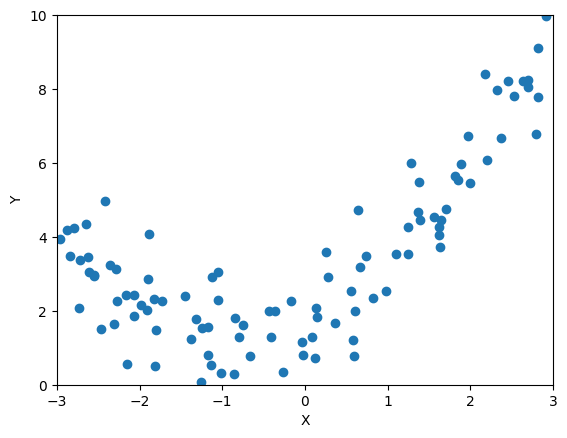

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X,y, label = "Points")
plt.axis([-3,3,0,10])
plt.xlabel("X")
plt.ylabel("Y")

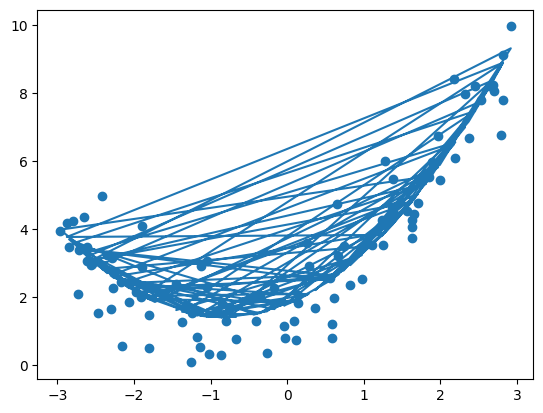

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features = PolynomialFeatures(degree = 2, include_bias = False)
X_polynomial = polynomial_features.fit_transform(X)

linear_reg = LinearRegression()
linear_reg.fit(X_polynomial,y)

linear_reg.coef_, linear_reg.intercept_

func = lambda x : linear_reg.coef_[0][1]*x**2 + linear_reg.coef_[0][0]*x + linear_reg.intercept_

plt.plot(X,func(X))
plt.scatter(X,y)

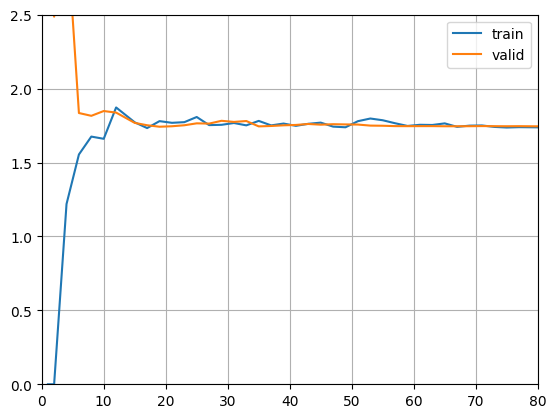

In [6]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),X,y,train_sizes = np.linspace(0.01,1,40), cv = 5, scoring = "neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes,train_errors, label = "train")
plt.plot(train_sizes,valid_errors,label = "valid")
plt.legend()
plt.axis([0,80,0,2.5])
plt.grid()
plt.show()

In [7]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    PolynomialFeatures(degree = 10, include_bias = False),LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    pipeline,X,y,train_sizes = np.linspace(0.01,1,40), cv = 5, scoring = "neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

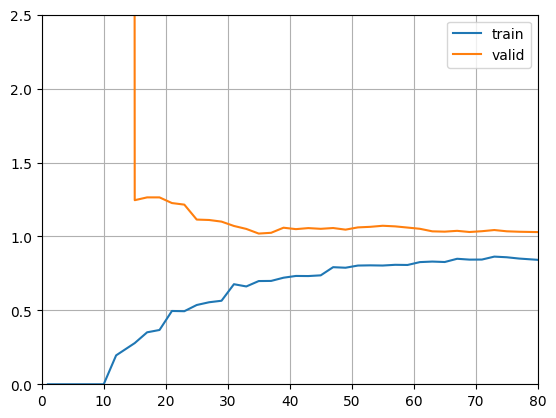

In [8]:
plt.plot(train_sizes,train_errors, label = "train")
plt.plot(train_sizes,valid_errors,label = "valid")
plt.legend()
plt.axis([0,80,0,2.5])
plt.grid()
plt.show()